In [1]:
import numpy as np

from scipy.integrate import quad 

import matplotlib.pyplot as plt

In [2]:
def rel_error(true, pred):
    error = true - pred
    rel_err = np.abs(error / (true + 1e-8))
    return rel_err

---

In [ ]:
# Model_Prediction.npz : xlin / target / dQdx / slin / prediction / integral / cum_idx / cum_true / cum_pred
Data_base = np.load('./Results/QNN/Ideal/Step/Uni/MSE/0.005/Model_Prediction.npz')
Data_1 = np.load('./Results/QNN/Ideal/Step/Imp/MSE/0.005/Model_Prediction.npz')
Data_2 = np.load('./Results/QNN/Ideal/Step/HMC/MSE/0.005/Model_Prediction.npz')
Data_3 = np.load('./Results/QNN/Ideal/Step/Uni/Chisqr/0.005/Model_Prediction.npz')

In [4]:
lower = -2*np.pi
upper = 2*np.pi
subintervals = 30
step = (upper - lower) / subintervals
major_ticks = np.arange(lower, upper+step, 5*step)

In [5]:
xlin = Data_base['xlin']
ylin = Data_base['target']
base_fit = Data_base['dQdx']
first_fit = Data_1['dQdx']
second_fit = Data_2['dQdx']
third_fit = Data_3['dQdx']

/var/folders/8x/lky2tzdd5d1_c4s2m36s6fb80000gn/T/ipykernel_38100/1203312387.py:52: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


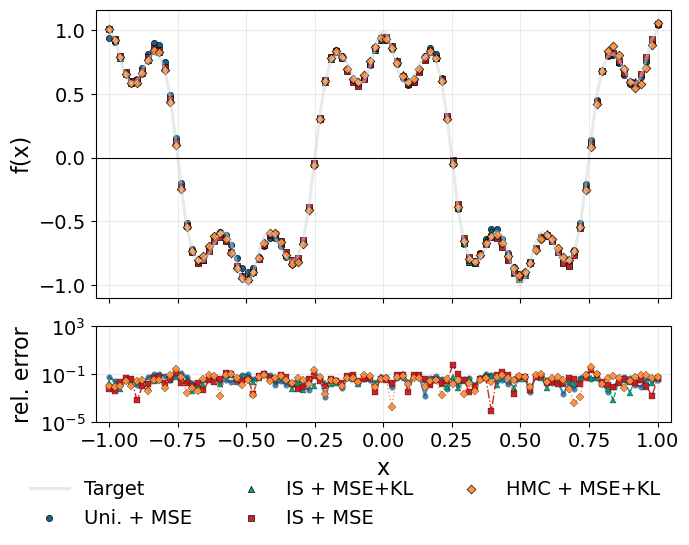

In [ ]:
plt.rcParams.update({
    "axes.labelsize": 16,    # 축 라벨
    "xtick.labelsize": 14,   # x축 눈금
    "ytick.labelsize": 14,   # y축 눈금
    "legend.fontsize": 14,   # 범례
})

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(7.0, 5.0),
    gridspec_kw={'height_ratios': [3, 1]},
    sharex=True,
    constrained_layout=True
)

##################### First Plot #####################
ax1.plot(xlin, ylin, color="#d4d4d5", linestyle="-", linewidth=2.2, alpha = .5, label="Target")

mkw = dict(edgecolor='black', linewidths=0.5) 
ax1.scatter(xlin, base_fit,   c="#045a8d", marker='o',  s=20, alpha = .95, label="Uni. + MSE",     **mkw)
ax1.scatter(xlin, first_fit,  c="#009E73", marker='^',  s=20, alpha = .95, label="IS + MSE",    **mkw)
ax1.scatter(xlin, second_fit, c="#cb181d", marker='s',  s=20, alpha = .95, label="HMC + MSE",       **mkw)
ax1.scatter(xlin, third_fit,  c="#fd8d3c", marker='D',  s=20, alpha = .95, label="Uni. + $\chi^2$",   **mkw) 

ax1.grid(True, linewidth=0.6, alpha=0.3)
ax1.set_ylabel("f(x)")
ax1.axhline(0, color="black", linewidth=0.8)
ax1.set_xlim(-1.05, 1.05)

##################### Second Plot #####################
rel_err_base = rel_error(ylin, base_fit)
rel_err_1    = rel_error(ylin, first_fit)
rel_err_2    = rel_error(ylin, second_fit)
rel_err_3    = rel_error(ylin, third_fit)

ax2.plot(xlin, rel_err_base, color="#045a8d", alpha = .7, 
         linewidth=1.5, linestyle='-',  label="Uni. + MSE", marker = 'o', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(xlin, rel_err_1,    color="#009E73", alpha = .95,
         linewidth=1, linestyle='--', label="IS + MSE+KL", marker = '^', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(xlin, rel_err_2,    color="#cb181d", alpha = .95,
         linewidth=1, linestyle='-.', label="IS + MSE", marker = 's', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(xlin, rel_err_3,    color="#fd8d3c", alpha = .95,
         linewidth=1, linestyle=':',  label="HMC + MSE+KL", marker = 'D', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)

ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e3)
ax2.grid(True, linewidth=0.6, alpha=0.3)
ax2.set_xlabel("x")
ax2.set_ylabel("rel. error")

handles, labels = ax1.get_legend_handles_labels()

fig.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol = 3, frameon=False, bbox_to_anchor=(0.5, -0.1))

plt.savefig("Step_derivative.pdf", bbox_inches="tight", dpi=300)

In [7]:
idx = Data_base['cum_idx']
true_cum = Data_base['cum_true']
base_cum = Data_base['cum_pred']
first_cum = Data_1['cum_pred']
second_cum = Data_2['cum_pred']
third_cum = Data_3['cum_pred']

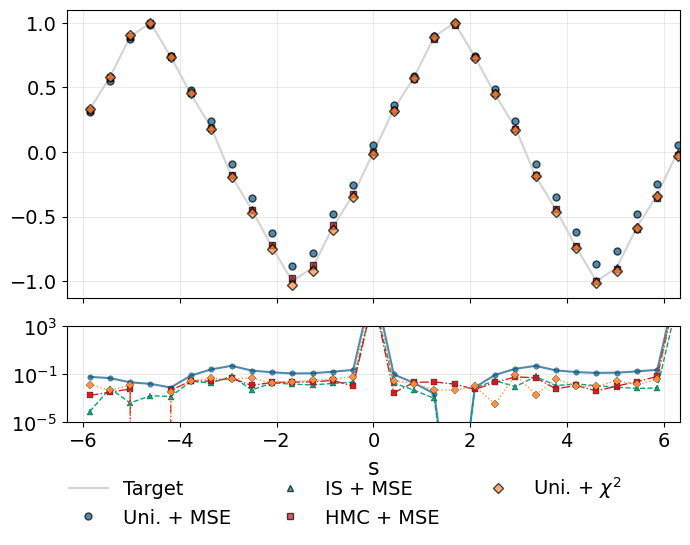

In [8]:
plt.rcParams.update({
    "axes.labelsize": 16,    # 축 라벨
    "xtick.labelsize": 14,   # x축 눈금
    "ytick.labelsize": 14,   # y축 눈금
    "legend.fontsize": 14,   # 범례
})

##################### First Plot #####################
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.0, 5.0), 
                               gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

ax1.plot(idx+step, true_cum, '-', color="#d4d4d5", markersize = 12, markeredgecolor = 'black', markeredgewidth=0.5, label = "Target")
ax1.plot(idx+step, base_cum, 'o', color="#045a8d", markersize = 5, markeredgecolor = 'black', alpha = .7, label="Uni. + MSE")
ax1.plot(idx+step, first_cum, '^', color="#009E73", markersize = 5, markeredgecolor = 'black', alpha = .7, label="IS + MSE")
ax1.plot(idx+step, second_cum, 's', color="#cb181d", markersize = 5, markeredgecolor = 'black', alpha = .7, label = "HMC + MSE")
ax1.plot(idx+step, third_cum, 'D', color="#fd8d3c", markersize = 5, markeredgecolor = 'black', alpha = .7, label="Uni. + $\chi^2$")

ax1.grid(True, linewidth=0.6, alpha=0.3)
ax1.set_xlim(lower - .05, upper + .05) 

##################### Second Plot #####################
rel_err_base = rel_error(true_cum, base_cum)
rel_err_1    = rel_error(true_cum, first_cum)
rel_err_2    = rel_error(true_cum, second_cum)
rel_err_3    = rel_error(true_cum, third_cum)

ax2.plot(idx+step, rel_err_base, color="#045a8d", alpha = .7, 
         linewidth=1.5, linestyle='-',  label="Uni. + MSE", marker = 'o', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(idx+step, rel_err_1,    color="#009E73", alpha = .95,
         linewidth=1, linestyle='--', label="IS + MSE+KL", marker = '^', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(idx+step, rel_err_2,    color="#cb181d", alpha = .95,
         linewidth=1, linestyle='-.', label="IS + MSE", marker = 's', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(idx+step, rel_err_3,    color="#fd8d3c", alpha = .95,
         linewidth=1, linestyle=':',  label="HMC + MSE+KL", marker = 'D', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)

ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e3)
ax2.grid(True, linewidth=0.6, alpha=0.3)
ax2.set_xlabel("s")

handles, labels = ax1.get_legend_handles_labels()

fig.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol = 3, frameon=False, bbox_to_anchor=(0.5, -0.1))

plt.savefig("CPF_cum_integral.pdf", bbox_inches="tight", dpi=300)


In [9]:
slin = Data_base['slin']
integral = Data_base['integral']
base_int = Data_base['prediction']
first_int = Data_1['prediction']
second_int = Data_2['prediction']
third_int = Data_3['prediction']

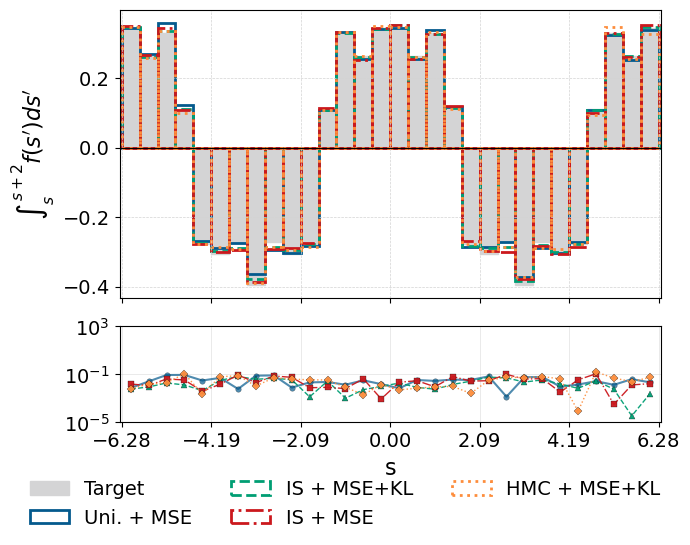

In [10]:
plt.rcParams.update({
    "axes.labelsize": 16,    # 축 라벨
    "xtick.labelsize": 14,   # x축 눈금
    "ytick.labelsize": 14,   # y축 눈금
    "legend.fontsize": 14,   # 범례
})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.0, 5.0), 
                               gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

##################### First Plot #####################
ax1.bar(slin, integral, align = 'edge', width = step, facecolor = "#d4d4d5", edgecolor ="#d4d4d5", fill = True, label = "Target")

ax1.bar(slin, base_int,   align = 'edge', width = step, edgecolor ="#045a8d", fill = False, linestyle = '-', lw = 2, label="Uni. + MSE")
ax1.bar(slin, first_int,  align = 'edge', width = step, edgecolor ="#009E73", fill = False, linestyle = '--', lw = 2, label="IS + MSE+KL")
ax1.bar(slin, second_int, align = 'edge', width = step, edgecolor ="#cb181d", fill = False, linestyle = '-.', lw = 2, label="IS + MSE")
ax1.bar(slin, third_int,  align = 'edge', width = step, edgecolor ="#fd8d3c", fill = False, linestyle = ':', lw = 2, label="HMC + MSE+KL") 

ax1.set_xticks(major_ticks)
ax1.axhline(0, color="black", linewidth=0.8)
ax1.set_xlim(lower - .05, upper + .05) 
ax1.grid(color="lightgray", linestyle="--", linewidth=0.5)
ax1.set_ylabel("$\int_s^{s+2} f(s')ds'$", )

##################### Second Plot #####################
rel_err_base = rel_error(integral, base_int)
rel_err_1    = rel_error(integral, first_int)
rel_err_2    = rel_error(integral, second_int)
rel_err_3    = rel_error(integral, third_int)

ax2.plot(slin+step/2, rel_err_base, color="#045a8d", alpha = .7, 
         linewidth=1.5, linestyle='-', marker = 'o', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(slin+step/2, rel_err_1,    color="#009E73", alpha = .95,
         linewidth=1, linestyle='--', marker = '^', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(slin+step/2, rel_err_2,    color="#cb181d", alpha = .95,
         linewidth=1, linestyle='-.', marker = 's', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)
ax2.plot(slin+step/2, rel_err_3,    color="#fd8d3c", alpha = .95,
         linewidth=1, linestyle=':', marker = 'D', markersize = 4, markeredgecolor='black', markeredgewidth=0.2)

ax2.set_yscale('log')
ax2.set_ylim(1e-5, 1e3)
ax2.grid(True, linewidth=0.6, alpha=0.3)
ax2.set_xlabel("s")

handles, labels = ax1.get_legend_handles_labels()

fig.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol = 3, frameon=False, bbox_to_anchor=(0.5, -0.1))

plt.savefig("CPF_integral.pdf", bbox_inches="tight", dpi=300)